C:\Users\Anna.DESKTOP-685L92J\AppData\Local\Temp\ipykernel_7564\3073260496.py:11: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print('id von t:', id(t.storage()))
C:\Users\Anna.DESKTOP-685L92J\AppData\Local\Temp\ipykernel_7564\3073260496.py:12: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print('id von t transponiert:', id(t_transpose.storage()))
C:\Users\Anna.DESKTOP-685L92J\AppData\Local\Temp\ipykernel_7564\3073260496.py:13: UserWarning: TypedStorage is deprecated. It will be removed in the future and Untyped

id von t: 1719877069024
id von t transponiert: 1719877315264
Test, ob Tensorobjekt auf ursprüngliche Daten weist:     False
"stride" t_transpose:  (1, 10)
"stride" t_u:  (1, 10)
"size" t_transpose:  torch.Size([10, 10])
"size" t_u:  torch.Size([9, 9])
"offset" t_transpose:  0
"offset" t_u:  11
IMG stride (4320, 3, 1)


Text(0.5, 1.0, 'Ausschnitt aus Originalbild mit niedrigerer Auflösung')

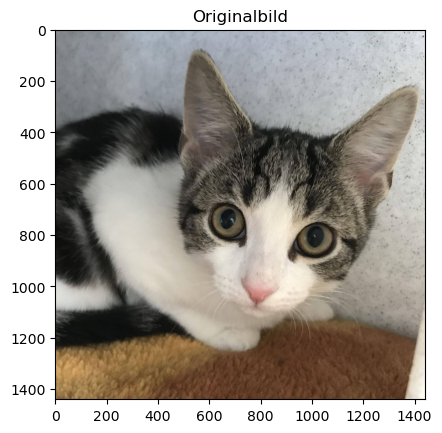

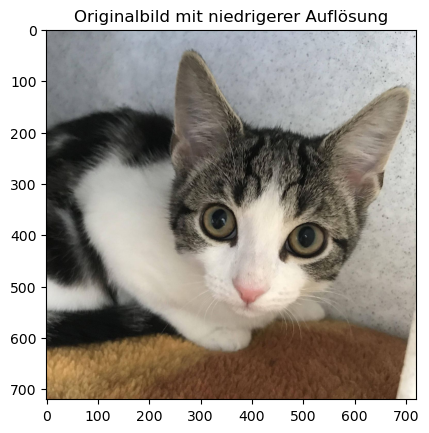

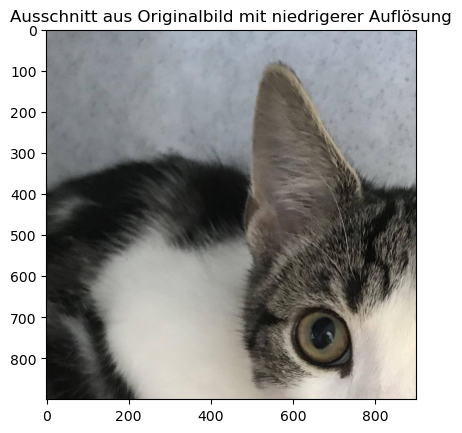

In [55]:
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import imageio

t = torch.tensor(np.arange(0,100).reshape((10,10))).to(torch.float)
t_transpose = t.t()

print('id von t:', id(t.storage()))
print('id von t transponiert:', id(t_transpose.storage()))
print('Test, ob Tensorobjekt auf ursprüngliche Daten weist:    ',id(t.storage()) == id(t_transpose.storage()))

t_u = t_transpose[1:,1:]  # erste Zeile und Spalte gelöscht
# stride, size, offset:
print('"stride" t_transpose: ',t_transpose.stride())
print('"stride" t_u: ',t_u.stride())
print('"size" t_transpose: ', t_transpose.size())
print('"size" t_u: ',t_u.size())
print('"offset" t_transpose: ', t_transpose.storage_offset())
print('"offset" t_u: ',t_u.storage_offset())

r = torch.tensor(np.identity(10))
det = np.linalg.det(r)
r_inv = torch.inverse(r)
r_t_mult = r_inv * t

img = imageio.imread("cat.jpg")
img_2 = torch.from_numpy(img)
# Auflösung um den Faktor 2 verrringern (stride verdoppeln, size halbieren):
print('IMG stride',img_2.stride())
img_t_o = torch.as_strided(img_2,(720, 720, 3),(8640,6, 1))
# Ausschnitt aus dem niedriger aufgelöstem Bild darstellen:
img_t_s = torch.as_strided(img_t_o,(900, 900, 3),(4320,3, 1))

plt.imshow(img)
plt.title('Originalbild')
plt.figure()
plt.imshow(img_t_o)
plt.title('Originalbild mit niedrigerer Auflösung')
plt.figure()
plt.imshow(img_t_s)
plt.title('Ausschnitt aus Originalbild mit niedrigerer Auflösung')
